<a href="https://colab.research.google.com/github/gioaprilino/Releases/blob/main/Template_Program_Forecating_TRPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Data**

data excel dikonversi menjadi format csv, baiknya konversi data menggunakan konverter online. Karena kalau langsung menyimpan file excel dalam bentuk csv sering tidak terbaca di codingan python. Data disimpan di folder sample_data colab.

In [78]:
import pandas as pd

data = pd.read_csv('/content/sample_data/finalData_updated.csv')
data.head()

,Date,Price
0,03-01-2022,18201
1,04-01-2022,1797
2,05-01-2022,17492
3,06-01-2022,172
4,07-01-2022,17217


In [79]:
#pip install matplotlib.pyplot as plt --> library untuk menampilkan grafik
#pip install sklearn --> library untuk pembagian dataset
#library metode masing-masing kelompok
!pip install statsmodels
!pip install matplotlib
!pip install scikit-learn
import matplotlib.pyplot as plt

## **Pembagian Dataset**
pembagian dataset menggunakan library sklearn yaitu import train_test_split

In [80]:
#In this cell do the dataset division first, for this cell divide the dataset with 70% (0.7) for training data and 30% (0.3) for testing data. And then print it out.
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, shuffle=False)
print(train)
print(test)

           Date  Price
0    03-01-2022  18201
1    04-01-2022   1797
2    05-01-2022  17492
3    06-01-2022    172
4    07-01-2022  17217
..          ...    ...
748  21-01-2024  19156
749  22-01-2024  19389
750  23-01-2024  19518
751  24-01-2024   1945
752  25-01-2024  19417

[753 rows x 2 columns]
            Date  Price
753   26-01-2024  19242
754   27-01-2024  19242
755   28-01-2024  19242
756   29-01-2024  19173
757   30-01-2024  18804
...          ...    ...
1071  09-12-2024  24675
1072  10-12-2024  24777
1073  11-12-2024  24649
1074  12-12-2024  24796
1075  13-12-2024  24813

[323 rows x 2 columns]


## **Pemodelan Forecasting**

In [81]:
#In this cell add the forecasting modeling code for exponential smoothing based on my data

from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = train.set_index('Date')
test = test.set_index('Date')

# Fit the model on the training data
model = ExponentialSmoothing(train['Price'], trend='add', seasonal='add', seasonal_periods=12).fit() # Adjust seasonal_periods if needed

# Make predictions on the test data
predictions = model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## **Menampilkan Grafik Hasil Training**

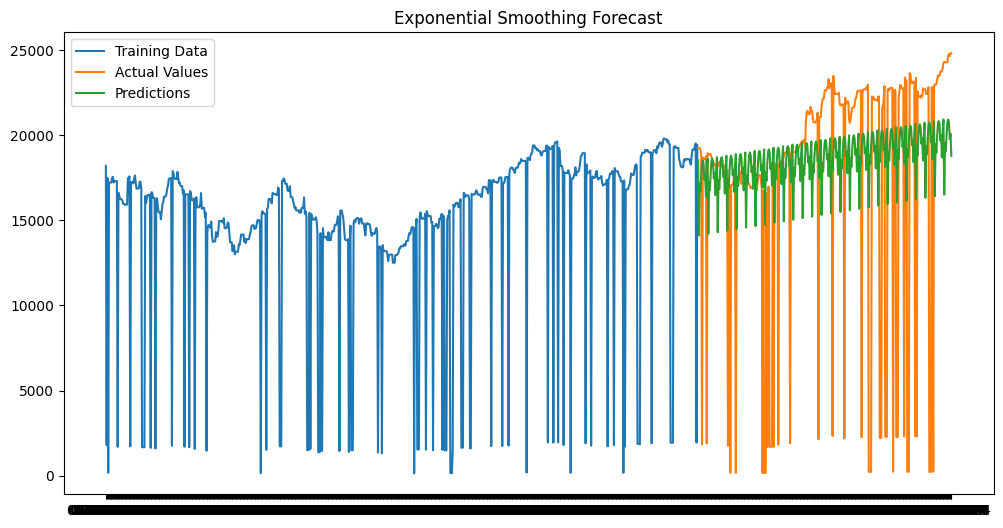

In [82]:
#tambahkan grafik hasil training di cell ini menggunakan library matplotlib
plt.figure(figsize=(12, 6))
plt.plot(train['Price'], label='Training Data')
plt.plot(test['Price'], label='Actual Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()

## **Evaluasi (testing) Pemodelan**

In [83]:
#In this cell, evaluate (test) the modeling in this cell. The evaluation methods used are MAE (Mean Absolute Error) and RMSE (Root Mean Square Error) methods.

from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate the model (example using Mean Absolute Error)
mae = mean_absolute_error(test['Price'], predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Price'], predictions))
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 4513.504372016711
Root Mean Squared Error: 7071.956188101299
